# **Final Project 3 Ensaemble**

Anggota kelompok :
1. Muhammad Reza Pahlevi
2. Caesariansyah Dwi Fadhilah

### **Introduction**

#### **Ensemble**

Ensemble learning, atau ensemble, telah menjadi landasan penting dalam paradigma machine learning modern. Dalam upaya untuk meningkatkan kinerja prediktif, ensemble learning memanfaatkan beberapa model sekaligus yang dikenal sebagai <span style="color:yellow">base learner</span>, untuk membentuk suatu model yang lebih baik dari model yang hanya terdiri dari satu jenis model saja.  Pendekatan ini berasal pada ide bahwa dengan menggabungkan berbagai perspektif dan keahlian dari beberapa model dapat mengatasi kelemahan individual dari setiap model, menghasilkan prediksi yang lebih akurat, dan meningkatkan ketahanan terhadap berbagai tantangan dalam data.<br>

Beberapa metode umum dalam ensemble learning melibatkan strategi khusus untuk menggabungkan hasil prediksi dari base learner. Cara-cara tersebut yaitu :<br>
1. **Bagging (Bootstrap Aggregation)**<br>
Merupakan  metode yang mengumpulkan hasil prediksi dari seluruh model dan kemudian merata-ratakannya untuk menghasilkan prediksi akhir. Bagging efektif dalam mengurangi variabilitas dan meningkatkan kestabilan prediksi.
2. **Boosting**<br>
merupakan metode dengan pendekatan  yang melibatkan pelatihan serangkaian model secara berurutan. Setiap model dilatih untuk fokus pada mengoreksi kesalahan dari model sebelumnya. Dengan menggabungkan hasil prediksi dari model-model yang telah ditingkatkan ini secara dibobot, sehingga dapat mencapai tingkat akurasi yang lebih tinggi.
3. **Stacking**<br>
merupakan metode yang melibatkan pelatihan beberapa model pada dataset yang sama. Prediksi dari model-model ini dijadikan sebagai input untuk model lain, yang dilatih untuk menghasilkan prediksi akhir. Pendekatan ini memungkinkan integrasi kompleksitas yang lebih tinggi dan mengoptimalkan kombinasi kekuatan dari berbagai model.

#### **Dataset**

Dataset Heart Failure Clinical merupakan kumpulan data klinis yang memberikan informasi mengenai pasien yang mengalami gagal jantung. Dataset ini berisi 299 item observasi dan 13 fitur terdiri dari 105 perempuan dan 194 laki-laki dengan rentang umur 40 sampai 95 tahun.Dataset ini dikumpulkan dari Institut Kardiologi dan di Rumahsakit Faisalabad (Punjab, Pakistan).<br>

Dataset dapat di unduh pada [Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data), sedangkan jurnal dapat di unduh pada [BMC Medical Informatics and Decision Making](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)



Fitur-fitur pada dataset ini meliputi:

| No. | Fitur              | Deskripsi                                                              |
|-----|---------------------|------------------------------------------------------------------------|
| 1   | Age                 | Usia pasien dalam tahun                                                |
| 2   | Sex                 | Jenis kelamin pasien (Pria/Wanita)                                     |
| 3   | ChestPainType       | Jenis nyeri dada (Tipikal Angina, Atipikal Angina, Non-Anginal Pain, Asimtomatik) |
| 4   | RestingBP           | Tekanan darah istirahat dalam mmHg                                      |
| 5   | Cholesterol         | Kolesterol serum dalam mg/dl                                           |
| 6   | FastingBS           | Gula darah puasa (1 jika >120 mg/dl, 0 jika tidak)                      |
| 7   | RestingECG          | Hasil elektrokardiogram istirahat (Normal, ST, LVH)                     |
| 8   | EjectionFraction    | Fraksi ejeksi ventrikel kiri                                           |
| 9   | SerumCreatinine     | Kreatinin serum dalam mg/dl                                            |
| 10  | SerumSodium         | Natrium serum dalam mEq/L                                              |
| 11  | HeartRate           | Detak jantung dalam denyut per menit                                   |
| 12  | Time                | Waktu (dalam hari) sejak diagnosis gagal jantung                       |
| 13  | DEATH_EVENT         | Apakah pasien sudah meninggal saat waktu follow-up                      |


#### **Objective**

1. Mampu memahami konsep Classification dengan Ensemble Model
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

### **Import Library**

In [110]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

**Python Library overview**<br>
Pada project kali ini menggunakan beberapa library umum untuk data manipulation yaitu <span style='color:yellow'>pandas</span> dan <span style='color:yellow'>numpy</span>, selain itu juga menggunakan seaborn, matplotlib dan plotly untuk data visualization sehingga memudahkan untuk memahami data yang sedang diolah. 

<span style='color:red'>Kenapa menggunakan plotly dan matplotlib?</span><br>Saya menggunakan <span style='color:yellow'>plotly</span> sehingga visualisasi dari sebuah data dapat lebih interaktif dan mudah dibaca, contohnya ada pada penggunaan box plot, saya merasa lebih mudah membacanya karena akan menunjukan q1, q2, dan q3 serta data data lainnya. mungkin dapat dibaca menggunakan kode `df.describe()` , tapi kenapa tidak bila dapat memudahkan dalam membaca sebuah data. Dilain sisi penggunaan <span style='color:yellow'>matplotlib</span> digunakan untuk visualisasi sebuah data yang jika menggunakan plotly cenderung memiliki waktu pemrosesan lebih lama.

Library lain yang digunakan dalam projek ini adalah <span style='color:yellow'>scikit-learn</span>, scikit-learn adalah library yang menyediakan tools untuk machine learning dan data mining.

### **Data Loading**

Data loading merupakan proses dalam memasukan suatu data dalam suatu program. Data pada projek ini merupakan data heart_failure_clinical_records_dataset.csv

In [2]:
df = pd.read_csv("D:/Kuliah/MSIB5/Hacktiv8/Dataset/FpDataSet/fp3/heart_failure_clinical_records_dataset.csv")
pd.set_option('display.max_columns', 50)
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dengan menggunakan `df.info()` dapat dilihat bahwa data berjumlah 299 dengan 13 fitur dan tidak ada data kosong, juga semua tipe data berbentuk numeric.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


melihat persebaran data menggunakan kode `df.describe().T` yang kemudian dilakukan visualisasi menggunakan matplotlib sehingga lebih mudah dalam membaca data.

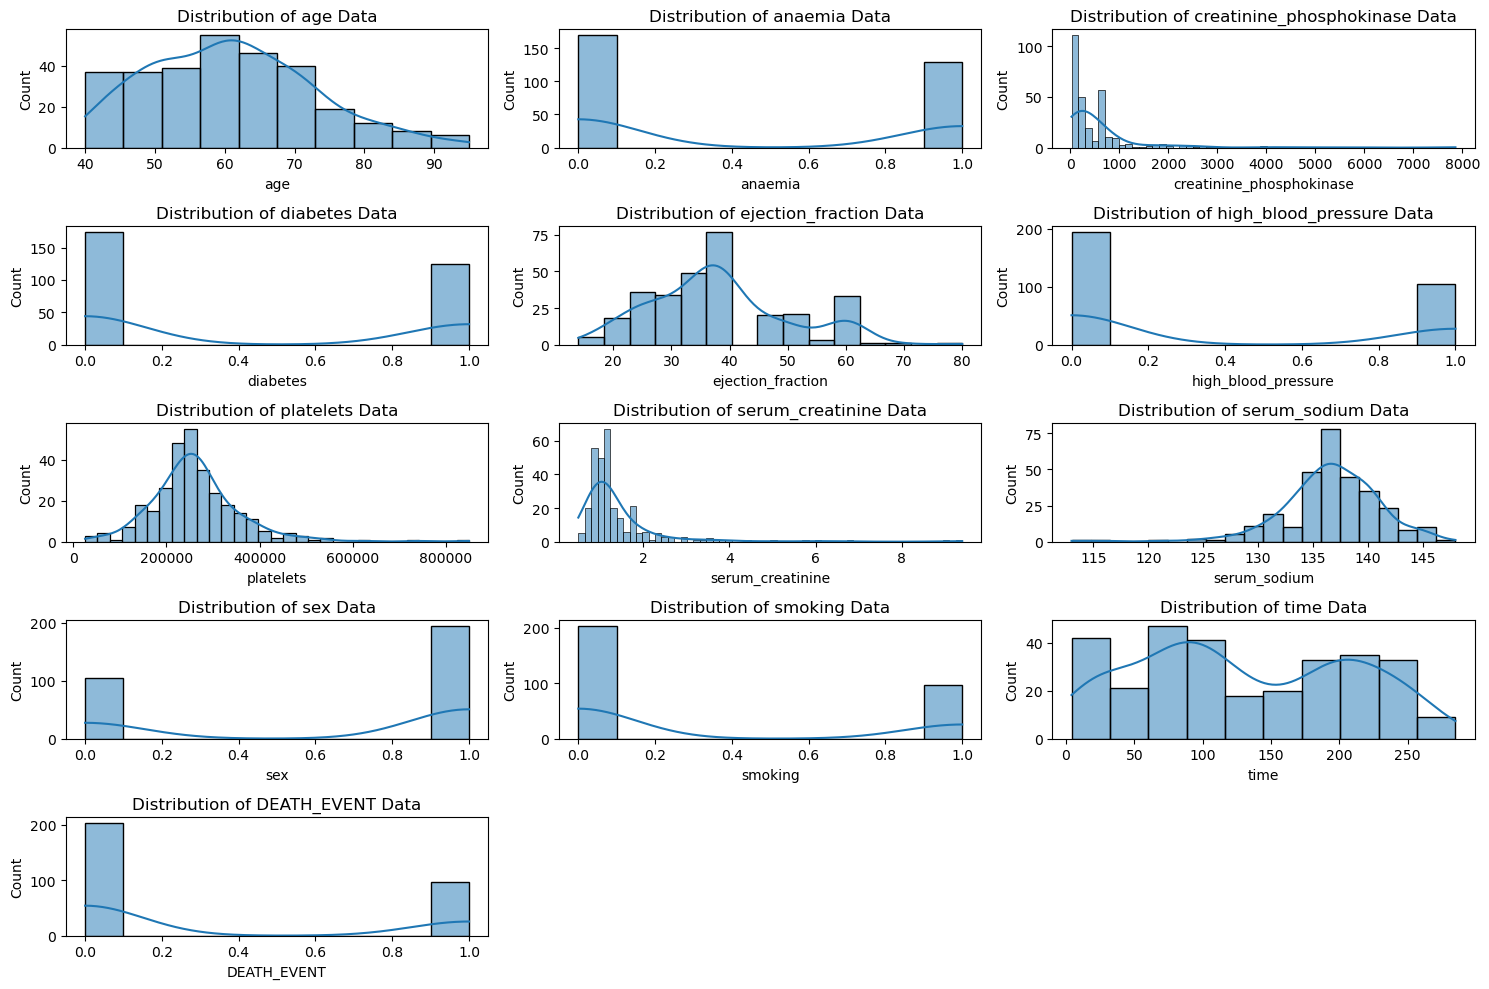

In [5]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

Dari visualisasi menggunakan histogram diatas menyatakan bahwa hampir tidak ada data yang terdistribusi normal, dengannilai yang paling mendekati distribusi normal adalah `plateles` dan nilai skewnes tertinggi ada pada fitur `Cretinine_phosphokinase`

### **Data Cleaning**

**Data Cleaning digunakan untk membersihkan data sebelum digunakan kedepannya, hal ini bertujuan untuk meningkatkan keakuratan atau kualitas analisa, menghindari kesalahan pengambilan keputusan, mengurangi kesalahan model serta banyak hal lain untuk meningkatkan kualitas hasil.**

- melakukan pengecekan akan adanya data yang terduplikasi menggunakan `df.duplicated().sum()`
- tidak perlu melakukan checking missing value dikarnakan sudah dilakukan checking menggunakan `df.info()` pada bagian data Loading dan tidak ada missing value

In [6]:
df.duplicated().sum()

0

dari kode ini kita mengetahui bahwa tidak ada data yang terduplikasi pada dataset ini. Proses selanjutnya adalah melihat seberapa banyak data unik dari masing masing fitur serta valuenya.

In [7]:
feature_df = df.columns
for i in feature_df:
    print(f" value unik fitur `{i}` berjumlah : ", df[i].nunique())
    print(" ")
    print(df[i].unique())
    print(" ")
    print("======================================================================")

 value unik fitur `age` berjumlah :  47
 
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
 
 value unik fitur `anaemia` berjumlah :  2
 
[0 1]
 
 value unik fitur `creatinine_phosphokinase` berjumlah :  208
 
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  71

Dari sini dapat dilihat bahwa pada fitur age ada value float dimana value lainnya berupa integer, serta akan mengganggu model apabila umur menggunakan float atau desimal maka akan di ubah menjadi 61.

In [8]:
df["age"]. replace([60.667], 61, inplace=True)

In [9]:
df['age'].nunique()

46

age dengan value 60.667 telah berhasi dirubah, ditandai dengan jumlah nilai unik yang tadinya 47 menjadi 46

#### <span style="color:red">Menangani outlier</span>

In [10]:
numCol = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'platelets', 'serum_creatinine', 'time']

menggambil data dari fitur non categorical lalu melakukan visualisasi dari data menggunakan box plot untuk melihat distribusi statistiknya.

In [11]:
for feature in df[numCol]:
    fig = px.box(df[numCol], y=feature, title=f'Boxplot of {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

Terlihat hasil visualisasi data diatas bahwa semua  categorical memiliki outlier kecuali age dan time.

In [12]:
def outlierDEL(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    lowBound = q1-1.5*IQR
    upBound = q3+1.5*IQR
    
    df[column] = df[column].apply(lambda x: lowBound if x<lowBound else (upBound if x> upBound else x))

fungsi berikut berguna untuk menghilangkan outlier dari data dengan mengganti nilai-nilai outlier dengan batas bawah apabila data memiliki value yang lebih rendah dari batas bawah dan mengganti outlier yang memiliki value lebih tinggi dari batas atas dengan value batas atas.

In [13]:
outliersCOL = ['creatinine_phosphokinase', 'ejection_fraction',  'serum_sodium', 'platelets', 'serum_creatinine']
for col in outliersCOL:
    outlierDEL(col)

menggunakan fungsi sebelumnya untuk menghilangkan outliers dari fitur yang dipilih yaitu `creatinine_phosphokinase`, `ejection_fraction`,  `serum_sodium`, `platelets`, dan `serum_creatinine`

In [14]:
for feature in df[outliersCOL]:
    fig = px.box(df[numCol], y=feature, title=f'Boxplot of {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

Setelah menggunakan fungsi untuk menghilangkan outlier, dapat dilihat pada visualisasi diatas bahwa data sudah tidak memiliki outliers.

### **EDA**

Nama fitur dirubah menjadi bahasa indonesia untuk memudahkan dalam EDA serta membuat dataframe baru yang berisi data dengan fitur yang sudah dirubah ke dalam bahasa indonesia.

In [15]:
dfClean = df.rename(columns={'age':'Usia', 
                        'anaemia':'Anemia', 
                        'creatinine_phosphokinase':'TesCPK', 
                        'diabetes':'Diabetes', 
                        'ejection_fraction':'EF', 
                        'high_blood_pressure':'Tekanan_darah', 
                        'platelets':'Trombosit', 
                        'serum_creatinine':'Serum_Kreatinina', 
                        'serum_sodium':'Serum_Sodium', 
                        'sex':'Gender', 
                        'smoking':'Merokok', 
                        'time':'Waktu', 
                        'DEATH_EVENT':'Kematian'})
dfClean.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Tekanan_darah,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,8,1


Menggunakan library `plotly` dan fungsi `corr()` untuk melihat hubungan dari setiap fitur yang ada.

In [16]:
px.imshow(dfClean.corr(),title="Correlation Plot of the Heat Failure Prediction")

Dari visualisasi diatas dapat disimpulkan bahwa hubungan antara waktu dan kematian memiliki  hubungan negatif, sementara serum kreatina memiliki hubungan positif yang cukup tinggi dengan kematian. beberapa fitur lain yang memiliki hubungan positif yang cukup mecolok adalah Merokok dan Gender, Serum_Kreatinina dan Usia.

#### Kematian

In [17]:
labels = ['Hidup', 'Meniggal']
death0 = dfClean[dfClean['Kematian']==0]
death1 = dfClean[dfClean['Kematian']==1]
values = [len(death0),len(death1)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title = "Rasio Kematian")
fig.show()

dari visualisasi diatas dapat dilihat bahwa perbandingan orang yang meninggal dan hidup adalah 2:1, hal ini akan sedikit menimbulkan masalah dimana hasil prediksi akan cenderung ke hidup.

#### Gender

In [18]:
male = dfClean[dfClean['Gender']==1]
female = dfClean[dfClean['Gender']==0]
labels = ['Laki-Laki', 'Perempuan']
values = [len(male), len(female)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title = "Rasio Gender")
fig.show()

In [19]:
male_s = male[dfClean['Kematian']==0]
male_ns = male[dfClean['Kematian']==1]
female_s = female[dfClean['Kematian']==0]
female_ns = female[dfClean['Kematian']==1]

labels = ['Laki-Laki - Survived','Laki-Laki - Not Survived', "Perempuan -  Survived", "Perempuan - Not Survived"]
values = [len(male[dfClean["Kematian"]==0]),len(male[dfClean["Kematian"]==1]), len(female[dfClean["Kematian"]==0]),len(female[dfClean["Kematian"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = "Presentase Kematian berdasarkan gender")
fig.show()

bisa dikatakan bahwa gender tidak berpengaruh, pada visualisassi diatas walau menunjukkan jumlah male lebih banyak, hal ini dikarenakan jumlah data dengan gender male lebih banyak.

#### Perokok

In [20]:
smokelabels = ['No Smoke', 'Smoke']
smoke0 = dfClean[dfClean['Merokok']==0]
smoke1 = dfClean[dfClean['Merokok']==1]
smokevalues = [len(smoke0),len(smoke1)]
fig = go.Figure(data=[go.Pie(labels=smokelabels, values=smokevalues)])
fig.update_layout(
    title = "Rasio Jumlah Perokok")
fig.show()

In [21]:
smoke = dfClean[dfClean['Merokok']==1]
nosmoke = dfClean[dfClean['Merokok']==0]

smoke_s = smoke[dfClean['Kematian']==0]
smoke_ns = smoke[dfClean['Kematian']==1]
nosmoke_s = nosmoke[dfClean['Kematian']==0]
nosmoke_ns = nosmoke[dfClean['Kematian']==1]

labels = ['Smoke - Survived','Smoke - Not Survived', "No Smoke -  Survived", "No Smoke - Not Survived"]
values = [len(smoke_s[dfClean["Kematian"]==0]),len(smoke_ns[dfClean["Kematian"]==1]), len(nosmoke_s[dfClean["Kematian"]==0]),len(nosmoke_ns[dfClean["Kematian"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = "Presentase Kematian berdasarkan perokok")
fig.show()

dari dua visualisasi diatas dapat dilihat bahwa seorang perokok atau tidak tidak terlalu mempengaruhi. walau data cenderung banyak pada tidak merokok tapi perbadingannya antara yang selamat dan tidak selamat adalah 2:1

#### Tekanan Darah

In [22]:
bp1 = dfClean[dfClean['Tekanan_darah']==1]
bp0 = dfClean[dfClean['Tekanan_darah']==0]
labels = ['Tekanan Darah Tinggi', 'Tekanan Darah Normal']
values = [len(bp1), len(bp0)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title = "Rasio Jumlah Penderita Anemia")
fig.show()

In [23]:
bp1_s = bp1[dfClean['Kematian']==0]
bp1_ns = bp1[dfClean['Kematian']==1]
bp0_s = bp0[dfClean['Kematian']==0]
bp0_ns = bp0[dfClean['Kematian']==1]

labels = ['Penderita Tekanan Darah Tinggi - Survived','Penderita Tekanan Darah Tinggi - Not Survived', "No Tekanan Darah Tinggi -  Survived", "No Tekanan Darah Tinggi - Not Survived"]
values = [len(bp1_s[dfClean["Kematian"]==0]),len(bp1_ns[dfClean["Kematian"]==1]), len(bp0_s[dfClean["Kematian"]==0]),len(bp0_ns[dfClean["Kematian"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = "Presentase Kematian berdasarkan penderita Tekanan Darah Tinggi")
fig.show()

rata-rata dari seluruh hasil visualiassi memiliki perbandingan di rentang 2:1

#### Diabetes

In [24]:
diabetsLabel = ['No Diaabetes', 'Diabetes']
diabet0 = dfClean[dfClean['Diabetes']==0]
diabet1 = dfClean[dfClean['Diabetes']==1]
diabetsValue = [len(diabet0),len(diabet1)]
fig = go.Figure(data=[go.Pie(labels=diabetsLabel, values=diabetsValue)])
fig.update_layout(
    title = "Rasio Jumlah Penderita Diabetes")
fig.show()

In [25]:
diabet_s = diabet1[dfClean['Kematian']==0]
diabet_ns = diabet1[dfClean['Kematian']==1]
nodiabet_s = diabet0[dfClean['Kematian']==0]
nodiabet_ns = diabet0[dfClean['Kematian']==1]

labels = ['Diaabetes - Survived','Diaabetes - Not Survived', "No Diaabetes -  Survived", "No Diaabetes - Not Survived"]
values = [len(diabet_s[dfClean["Kematian"]==0]),len(diabet_ns[dfClean["Kematian"]==1]), len(nodiabet_s[dfClean["Kematian"]==0]),len(nodiabet_ns[dfClean["Kematian"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = "Presentase Kematian berdasarkan penderita Diabetes")
fig.show()

pada visualisasi diatas dapat dilihat bahwa perbadingan antara orang yang selamat dan tidak adalah 2,1:1 dari penderita diabetes maupun bukan penderita diabetes. dari visualiassi yang didapatkan selamaa ini, hasil visualisassi cenderung bias diakernakan data yang skewness serta jumlah data yang terlalu sedikit.



#### Anemia

In [26]:
anemia1 = dfClean[dfClean['Anemia']==1]
anemia0 = dfClean[dfClean['Anemia']==0]
labels = ['Anemia', 'Non Anemia']
values = [len(anemia1), len(anemia0)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title = "Rasio Jumlah Penderita Anemia")
fig.show()

In [27]:
anemia1_s = anemia1[dfClean['Kematian']==0]
anemia1_ns = anemia1[dfClean['Kematian']==1]
anemia0_s = anemia0[dfClean['Kematian']==0]
anemia0_ns = anemia0[dfClean['Kematian']==1]

labels = ['Penderita Anemia - Survived','Penderita Anemia - Not Survived', "No Anemia -  Survived", "No Anemia - Not Survived"]
values = [len(anemia1_s[dfClean["Kematian"]==0]),len(anemia1_ns[dfClean["Kematian"]==1]), len(anemia0_s[dfClean["Kematian"]==0]),len(anemia0_ns[dfClean["Kematian"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = "Presentase Kematian berdasarkan penderita Anemia")
fig.show()

vsualiassi diatas menujukkan bahwa dari 170 orang bukan penderita anemia 120 orang berhasil selamat dan 50 orang meninggal. Sedangakn dari 129 orang penderita anemia 83 orang berhasil selamat.

#### Usia

In [28]:
age_s = dfClean[dfClean['Kematian']==0]['Usia']
age_ns = dfClean[dfClean['Kematian']==1]['Usia']
age_value = [age_s,age_ns]
labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(age_value, labels, bin_size=0.5)
fig.update_layout(title = 'Age on Survival Status')
fig.show()

dari visualisasi diatas menunjukkan bahwa orang yang selamat dari serangan jantung cukup banyak di rentang umur 40 tahun hingga 70 tahun. Sedangkan orang yang tidak selamat dari serangan jantung cenderung tersebar merata pada setiap rentang usia.

#### Serum Kreatinina

In [29]:
ser_s = dfClean[dfClean['Kematian']==0]['Serum_Kreatinina']
ser_ns = dfClean[dfClean['Kematian']==1]['Serum_Kreatinina']
ser_value = [ser_s,ser_ns]
labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(ser_value, labels, bin_size=0.5)
fig.update_layout(title = 'Serum Kreatinina on Survival Status')
fig.show()

### **Preprocessing**

<span style="color:red">**Saya sengaja tidak memasukkan atau menggunakan feature selection pada project 3 ini dikarenakan hanya memiliki fitur yang terbilang kecil yaitu 12 fitur. Walau mungkin bisa dikatakan termasuk resources waste tapi karena disini memiliki konteks pembelajaran, saya ingin mengetahui pengaruh apabila tidak menggunakan feature selection.**</span>

In [30]:
X = dfClean.drop('Kematian', axis = 1)
y = dfClean['Kematian']

pada kode ini membagi menjadi atribut dependent dan independent

In [31]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

kode ini berguna untuk memperbanyak sampel dari kelas minoritas dengan menambahkan sampel acak dari yang sudah ada serta berusaha memndistribusikannya menjadi distribusi normal.

In [32]:
X.shape

(299, 12)

In [33]:
X_resampled.shape

(406, 12)

dapat dilihat bahwa jumalah bertambah menjadi 406 yang awalnya hanya 299

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

kode ini berguna untuk membagi dataset menjadi train dan test, dengan train berjumlah 80% dari data dan test berjumlah 20% dari data.

In [35]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

kode ini intinya adalah memebrikan label dan merubah categiorical menjadi numerik

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kode ini berguna untuk menormalkan fitur-fitur dataset sehingga setiap fitur memiliki mean nol dan deviasi standar satu. Hal ini dilakukan dengan mengurangkan mean dari setiap fitur dan membagi hasilnya dengan deviasi standar.

### **Model Defining**

Kegunaan dari kode ini adalah untuk menemukan kombinasi hyperparameter yang optimal untuk model-model yang telah dipilih, dengan menggunakan hyperparameter tuning dapat meningkatkan akurasi dan kualitas model.

> **Random Forest**

In [37]:
param_distRF = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_distRF, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

> **Gradient Boosting**

In [38]:
param_distGB = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'ccp_alpha' : [0.0, 0.1, 0.2]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(gb_model, param_distributions=param_distGB, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

> **Logistic Regression**

In [39]:
param_distLR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lr_model = LogisticRegression(random_state=42)
lr_random = GridSearchCV(lr_model, param_distLR, cv=5, verbose=2, n_jobs=-1)

> **SVC**

In [40]:
param_distSVC = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
}

svc_model = SVC(random_state=42)
svc_random = RandomizedSearchCV(svc_model, param_distributions=param_distSVC, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


> **Bagging**

<span style="color:red"> **Model Defining** untuk model ini dimasukkan pada bagian **Model Training**, Hal ini dilakukan model ini membutuhkan model sebelumnya yang sudah jadi.</span>

> **Stacking**

<span style="color:red"> **Model Defining** untuk model ini dimasukkan pada bagian **Model Training**, Hal ini dilakukan model ini membutuhkan model sebelumnya yang sudah jadi.</span>

### **Model Training**

Pada bagian berisi pelatihan setiap model

> **Random Forest**

In [41]:
rf_random.fit(X_train_scaled, y_train_encoded)
best_rf_model = rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


> **Gradient Boosting**

In [42]:
gb_random.fit(X_train_scaled, y_train_encoded)
best_gb_model = gb_random.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


> **Logistic Regression**

In [43]:
lr_random.fit(X_train_scaled, y_train_encoded)
best_lr_model = lr_random.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


> **SVC**

In [44]:
svc_random.fit(X_train_scaled, y_train_encoded)
best_svc_model = svc_random.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


> **Stacking**

In [45]:
base_model =[
    ('rf', best_rf_model),
    ('gb', best_gb_model),
    ('svc', best_svc_model),
    ('lr', best_lr_model)
]
meta_model = LogisticRegression(random_state=42)

Menentukan base model untuk Stacking, model model diambil dari model yang sudah di buat dan di train sebelumnya.

In [46]:
st_model = StackingClassifier(estimators=base_model, final_estimator=meta_model, cv=5)
param_distST = {
    'final_estimator__C': [0.001, 0.01, 0.1, 1, 10]
}
st_random = RandomizedSearchCV(st_model, param_distributions= param_distST, n_iter=10, cv=5, random_state=42, n_jobs=-1)

Hyperparameter ini digunakan untuk `meta_model` yaitu  Logistic Regression.

In [47]:
st_random.fit(X_train_scaled, y_train_encoded)
best_ST_model = st_random.best_estimator_

> **Bagging**

In [48]:
bagging_model = BaggingClassifier(base_estimator=best_rf_model, n_estimators=100, random_state=46)

In [49]:
bagging_model.fit(X_train_scaled, y_train_encoded)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        max_features='auto',
                                                        min_samples_leaf=2,
                                                        min_samples_split=10,
                                                        n_estimators=200,
                                                        random_state=42),
                  n_estimators=100, random_state=46)

### **Model Evaluation**

Proses ini adalah proses penilaian dan pengukuran kinerja suatu model terhadap data yang belum pernah dilihat sebelumnya, dalam kasus ini adalah data yang sudah dibagi sebelumnya yaitu pada bagian data test. Tujuannya adalah untuk memahami sejauh mana model dapat membuat prediksi yang akurat dan relevan terhadap tugas yang diberikan. Evaluasi model membantu menentukan seberapa baik model tersebut dapat digeneralisasikan ke data baru dan seberapa baik model tersebut dapat memenuhi tujuan spesifik yang diinginkan.

In [50]:
def modelEva(mod, mdNM):
    y_pred = mod.predict(X_test_scaled)
    cfm = confusion_matrix(y_test_encoded, y_pred)
    
    tr_acc = mod.score(X_train_scaled, y_train_encoded)
    ts_acc = accuracy_score(y_test_encoded, y_pred)
    cv_scr = cross_val_score(mod, X_train_scaled, y_train_encoded, cv = 5, scoring='accuracy')
    cv_scrAvg =cv_scr.mean()
    
    print(f"{mdNM} Model : ")
    print("Training accuracy score : ", tr_acc)
    print("Testing accuracy score : ", ts_acc)
    print("Cross-validation scores : ", cv_scr)
    print("Average cross-validation score :", cv_scrAvg)
    print(classification_report(y_test_encoded, y_pred))
    sns.heatmap(cfm, annot=True, fmt="d", linewidths=.5, cmap = 'BuPu')
    plt.show()
    
    tr_accR = round(tr_acc*100, 2)
    ts_accR = round(ts_acc*100, 2)
    cv_scrAvgR = round(cv_scrAvg*100, 2)

    md_acc.append({
        'model' : mdNM,
        'trainig_accuracy' : tr_accR,
        'testing_accuracy' : ts_accR,
        'cv_score_avg' : cv_scrAvgR
    })
md_acc = []  

Fungsi ini dibuat untuk melihat hasil akurasi dari train dan test, serta melihat skor dari cross Validation Score juga melihat heatmap. Fungsi ini juga berguna untuk menyiimpan score sebagai Dictionary

> **Random Forest**

Random Forest Model : 
Training accuracy score :  0.9845679012345679
Testing accuracy score :  0.926829268292683
Cross-validation scores :  [0.92307692 0.87692308 0.89230769 0.86153846 0.96875   ]
Average cross-validation score : 0.9045192307692307
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.87      1.00      0.93        41

    accuracy                           0.93        82
   macro avg       0.94      0.93      0.93        82
weighted avg       0.94      0.93      0.93        82



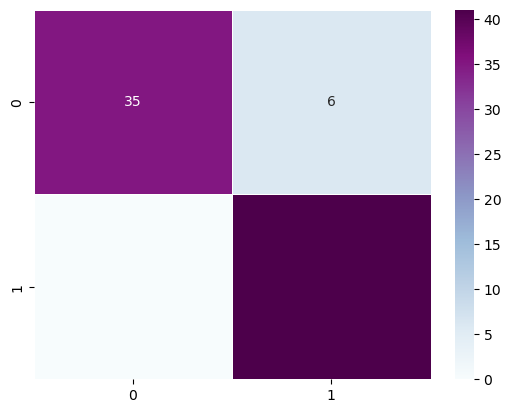

In [51]:
modelEva(best_rf_model, 'Random Forest')

> **Gradient Boosting**

Gradient Boosting Model : 
Training accuracy score :  1.0
Testing accuracy score :  0.9146341463414634
Cross-validation scores :  [0.86153846 0.89230769 0.89230769 0.87692308 0.921875  ]
Average cross-validation score : 0.8889903846153846
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.87      0.98      0.92        41

    accuracy                           0.91        82
   macro avg       0.92      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



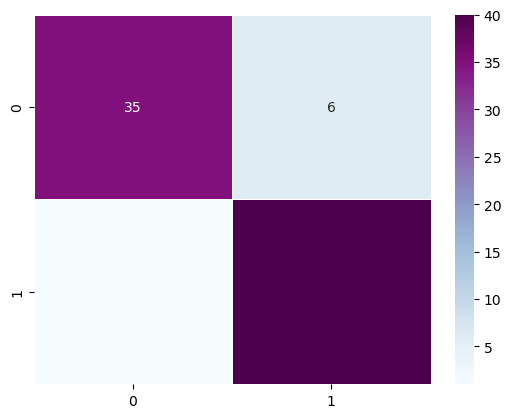

In [52]:
modelEva(best_gb_model, 'Gradient Boosting')

> **Logistic Regression**

Logistic Regresion Model : 
Training accuracy score :  0.8271604938271605
Testing accuracy score :  0.7804878048780488
Cross-validation scores :  [0.81538462 0.81538462 0.84615385 0.76923077 0.859375  ]
Average cross-validation score : 0.8211057692307693
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.78      0.78      0.78        41

    accuracy                           0.78        82
   macro avg       0.78      0.78      0.78        82
weighted avg       0.78      0.78      0.78        82



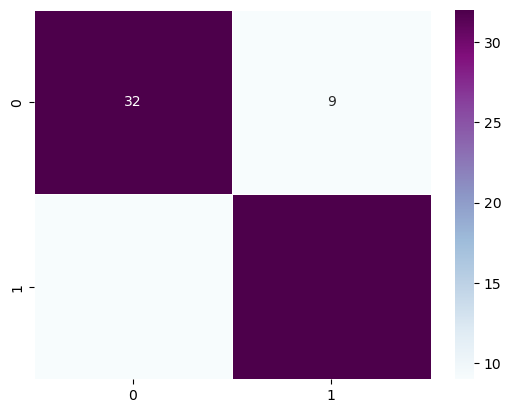

In [53]:
modelEva(best_lr_model, 'Logistic Regresion')

> **SVC**

SVC Model : 
Training accuracy score :  0.9320987654320988
Testing accuracy score :  0.8536585365853658
Cross-validation scores :  [0.84615385 0.83076923 0.87692308 0.83076923 0.9375    ]
Average cross-validation score : 0.864423076923077
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.84      0.88      0.86        41

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



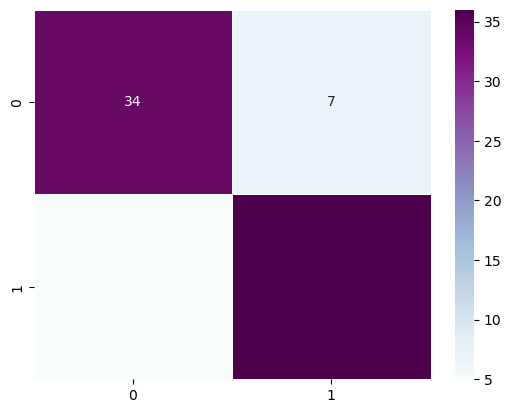

In [54]:
modelEva(best_svc_model, 'SVC')

> **Stacking**

Stacking Model : 
Training accuracy score :  0.9969135802469136
Testing accuracy score :  0.9146341463414634
Cross-validation scores :  [0.92307692 0.86153846 0.90769231 0.83076923 0.953125  ]
Average cross-validation score : 0.8952403846153846
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.87      0.98      0.92        41

    accuracy                           0.91        82
   macro avg       0.92      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



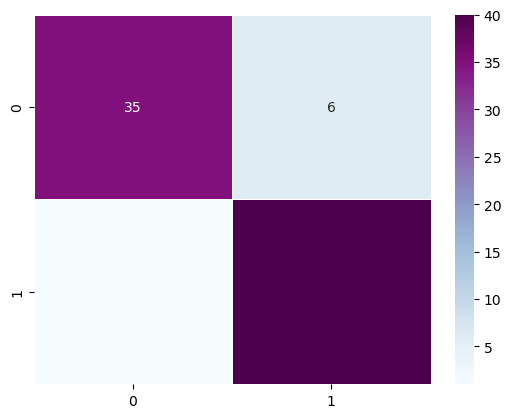

In [55]:
modelEva(best_ST_model, 'Stacking')

> **Bagging**

Bagging Model : 
Training accuracy score :  0.9567901234567902
Testing accuracy score :  0.8902439024390244
Cross-validation scores :  [0.89230769 0.83076923 0.89230769 0.84615385 0.96875   ]
Average cross-validation score : 0.8860576923076924
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.85      0.95      0.90        41

    accuracy                           0.89        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



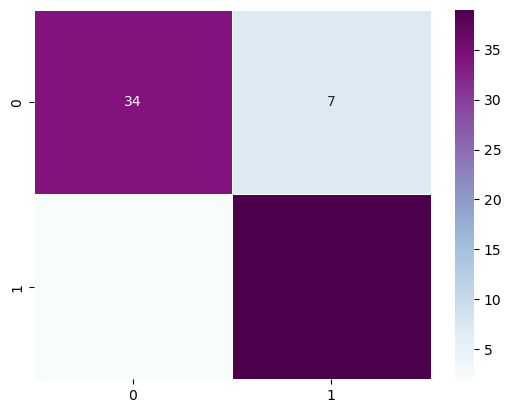

In [56]:
modelEva(bagging_model, 'Bagging')

In [57]:
dfMD_acc = pd.DataFrame(md_acc)
dfMD_acc.head(6)

,model,trainig_accuracy,testing_accuracy,cv_score_avg
0,Random Forest,98.46,92.68,90.45
1,Gradient Boosting,100.00,91.46,88.90
2,Logistic Regresion,82.72,78.05,82.11
3,SVC,93.21,85.37,86.44
4,Stacking,99.69,91.46,89.52
5,Bagging,95.68,89.02,88.61


In [79]:
dfTr = dfMD_acc.sort_values(by='trainig_accuracy', ascending = False)
figFinalTr = px.bar(dfTr, x='trainig_accuracy', y='model', 
                    orientation='h',
                    hover_data=['testing_accuracy','cv_score_avg'],
                    labels={'trainig_accuracy':'Training Accuracy Score', 'model':'Model Name'},
                    title='Training Accuracy Comparison')
figFinalTr.show()

In [78]:
dfTS = dfMD_acc.sort_values(by='testing_accuracy', ascending = False)
figFinalTs = px.bar(dfTS, x='testing_accuracy', y='model', 
                    orientation='h',
                    hover_data=['testing_accuracy','cv_score_avg'],
                    labels={'testing_accuracy':'Testing Accuracy Score', 'model':'Model Name'},
                    title='Testing Accuracy Comparison')
figFinalTs.show()

Dari visualisasi semua model yang digunakan, model Random Forest Classifier memiliki testing akurasi yang paling baik daripada model yang lainnya dengan akurasi sebesar 92,68%, sedangkan testing akurasi paling rendah dimiliki oleh model Logistic Regrsion dengan 78,05%. Akurasi training tertinggi ada pada Gradient Boosting dengan 100% dan terendah dimiliki oleh Logistic Regression dengan 82.72%.

Dapat disimpulakn bahwa Gradient Boosting mungkin mengalami overfitting dikarenakan training akurasi yang mencapai 100% dan testing yang hanya 91% akan tetapi dengan recall di angka 0.85 dan 0.98 menunjukkan model bekerja cukup baik juga didukung dengan nilai f1-score yang menunjukkan nilai diangka 91 dan 92 mengindikasikan bahwa keseimbangan yang baik antara recal dan precision.

### **Model Inference**

Tahap ini tahap di mana model machine learning yang sudah dilatih (trained) 
digunakan untuk membuat prediksi atau memberikan output berdasarkan data yang berbeda dari sebelumnya. 
Pada tahap inference, model diuji pada data baru yang tidak digunakan selama proses pelatihan.


In [103]:
X_inf = {'Usia':[30, 100], 
         'Waktu':[3,290],
         'Serum_Kreatinina':[0.4, 2.2],
         'EF':[13.0,70.0],
         'Serum_Sodium':[120.0,150.0],
         'TesCPK':[20.0,1300.0],
         'Trombosit':[75000.00,500000.00],
         'Anemia':[0,1],
         'Tekanan_darah':[0,1],
         'Gender':[0,1],
         'Merokok':[0,1],
         'Diabetes':[0,1]
         }

random.seed(99)
for col in X_inf:
    X_inf[col] += [random.uniform(min(X_inf[col]), max(X_inf[col])) for _ in range(10)]
    
X_inf = pd.DataFrame(X_inf)
X_inf.head(30)

,Usia,Waktu,Serum_Kreatinina,EF,Serum_Sodium,TesCPK,Trombosit,Anemia,Tekanan_darah,Gender,Merokok,Diabetes
0,30.000000,3.000000,0.400000,13.000000,120.000000,20.000000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100.000000,290.000000,2.200000,70.000000,150.000000,1300.000000,500000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,58.278465,143.421913,1.929941,69.405488,143.755173,564.537894,184470.043941,0.608035,0.797966,0.399101,0.443974,0.249721
3,44.005281,124.010477,1.009852,43.455672,137.862526,130.104181,246728.757215,0.408299,0.846125,0.822367,0.311419,0.296377
4,42.516162,178.993010,2.104346,39.338941,149.486643,416.552864,399612.845135,0.096483,0.117213,0.399410,0.654334,0.751506
5,47.390192,65.190694,1.351689,64.313809,148.317318,27.254967,225368.621760,0.143662,0.822348,0.414065,0.653364,0.080127
6,83.191421,261.873804,1.794052,47.514020,139.808990,442.013036,370374.536159,0.174135,0.185952,0.370977,0.310656,0.437816
7,47.580571,110.332198,1.244270,68.672577,121.111865,689.954666,466934.741279,0.177646,0.072389,0.092664,0.874230,0.963807
8,56.814731,114.388101,1.124721,33.378921,120.699115,277.016849,130643.950506,0.145511,0.287714,0.879568,0.720725,0.256213
9,77.901605,198.839850,0.884919,25.301929,134.211806,1027.636308,442170.015576,0.207579,0.585693,0.923036,0.218604,0.503151


membuat data dummy dengan RNG :)

In [104]:
X_inf = scaler.fit_transform(X_inf)

melakukan scaling ulang pada data dummy

In [106]:
y_pred_inf1 = best_rf_model.predict(X_inf)
y_pred_inf2 = best_gb_model.predict(X_inf)
y_pred_inf3 = best_lr_model.predict(X_inf)
y_pred_inf4 = best_svc_model.predict(X_inf)
y_pred_inf5 = best_ST_model.predict(X_inf)
y_pred_inf6 = bagging_model.predict(X_inf)
print('prediksi Random Forest: ', y_pred_inf1)
print('prediksi Gradient Boosting: ', y_pred_inf2)
print('prediksi Logistic Regresion: ', y_pred_inf3)
print('prediksi SVC: ', y_pred_inf4)
print('prediksi Stacking: ', y_pred_inf5)
print('prediksi Bagging: ', y_pred_inf6)

prediksi Random Forest:  [1 0 1 1 0 1 0 0 1 0 0 1]
prediksi Gradient Boosting:  [1 0 1 1 0 1 0 0 1 0 0 1]
prediksi Logistic Regresion:  [1 0 1 1 0 1 0 0 1 0 0 1]
prediksi SVC:  [1 1 1 0 0 0 0 0 1 0 0 1]
prediksi Stacking:  [1 0 1 1 0 1 0 0 1 0 0 1]
prediksi Bagging:  [1 0 1 1 0 1 0 0 1 0 0 1]


Dari pengetesan data dummy dapat dilihat bahwa hampir semua model memiliki output yang sama kecuali milik SVC dengan dua value yang berbeda yaitu pada index 1 dan index 5, hasil seperti ini menurut saya menunjukkan kinerja model yang cukup baik.


### **Conclusion**

Dalam Final Projek 3 ini, saya mempelajari dan membandingkan kinerja berbagai model machine learning untuk memprediksi gagal jantung. Model yang dievaluasi yaitu Random Forest, Gradient Boosting, Logistic Regression, Support Vector Classifier (SVC), Stacking, dan Bagging. Analisis difokuskan pada akurasi pelatihan, akurasi pengujian, cross-validation scores, dan precision-recall metrics.

1. **Random Forest Model:**
    - Mendapatkan akurasi pengujian tertinggi dengan presentase 92,68%.
    - Menunjukkan precision dan recall yang imbang.
    - Menunjukkan performa yang sangat baik untuk prediksi gagal jantung.
2. **Gradient Boosting Model:**
    - Memiliki presentase akurasi pelatihan yang sempurna(100%) akan tetapi akurasi pengujian yang sedikit rendah(91.46%)
    - Menunjukkan precision dan recall yang imbang.
    - Menujukkan kecenderungan overfit dengan akurasi pelatihan di angka 100%, dimana apabila pengaplikasian di dunia nyata hampir tidak mungkin.
3. L**ogistic Regression Model:**
    - Mendapatkan akurasi yang cukup baik (78,05%) sebagai model prediksi, aka tetapi kurang baik apabila digunakan sebahai model yang berhubungan dengan kesehatan.
    - Menunjukkan precision dan recall yang imbang.
    - Memiliki model yang sederhana
4. **Support Vector Classifier (SVC):**
    - Akurasi masih baik karena berada di angka 85,37%.
    - Menunjukkan precision dan recall yang imbang.
    - Memerlukan sedikit tambahan penyesuaian untu parameternya sehingga menghasilkan model yang lebih baik.
5. **Stacking Model:**
    - Memiliki akurasi pengujian yang tinggi(91,46%) serta memiliki precision dan recall yang imbang.
    - Menunjukkan kelebihan dalam menggabungkan model yang ada untuk meningkatkan performa dari sebuah model.
6. **Bagging Model:**
    - Memiliki performa yang baik dengan akurasi pengujian 89%
    - Menunjuukan seberapa efektifnya mode ensemble learning.

Selain itu dari Model Evaluation dapat kita simpulkan hasil semua model sebagai berikut :
1. Random Forest, Stacking, dan Bagging model menujukan performa yang sangat baik dengan presentase akurasi yang tinggi.
2. Gradient Boosting memiliki kecenderungan untuk menjadi overfit dengan akurasi training 100% dan akurasi testing 91.46%.
3. Logistic Regresion memiliki performa yang cukup baik walaupun tidak terlalu baik apabila performanya dibandingkan dengan model yang lain.
4. SVC memiliki performa yang baik akan tetapi mungkin perlu sedikit penambahan di hyper parameter.
5. Perbedaan hasil berbagai model ini disebabkan oleh arsitektur setiap model yang berbeda juga tidak lepas dari parameter yang di tetapkan di setiap modelnya. 

